In [ ]:
# Key Business Decisions:

1.To determine whether to send the catalog to the 250 new customers.
2.To acertain if the expected profit contribution from sending the catalog exceeds $10,000.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
p1_Customers2 = pd.read_excel("p1_Customers2.xlsx")

In [3]:
p1_mailinglist1 = pd.read_excel("p1_mailinglist1.xlsx")

In [4]:
p1_mailinglist1['Combined_Column'] = p1_mailinglist1['Score_No'].astype(str) + '-' + p1_mailinglist1['Score_Yes'].astype(str)

print(p1_mailinglist1)

     Serial Number             Name              Customer_Segment  \
0                2       A Giametti             Loyalty Club Only   
1                3     Abby Pierson  Loyalty Club and Credit Card   
2                4    Adele Hallman             Loyalty Club Only   
3                5  Alejandra Baird             Loyalty Club Only   
4                6     Alice Dewitt             Loyalty Club Only   
..             ...              ...                           ...   
245            247   Wanda Stiveson              Credit Card Only   
246            248   Wendy Crenshaw             Loyalty Club Only   
247            249     Wendy Renaud             Loyalty Club Only   
248            250       Wilma Reid              Credit Card Only   
249            251      Yvette Kent              Credit Card Only   

     Customer_ID              Address        City State    ZIP  Store_Number  \
0           2213    5326 S Lisbon Way  Centennial    CO  80015           105   
1          

In [5]:
null_counts = p1_Customers2.isnull().sum()
print(null_counts)

Name                          0
Customer_Segment              0
Customer_ID                   0
Address                       0
City                          0
State                         0
ZIP                           0
Avg_Sale_Amount               0
Store_Number                  0
Responded_to_Last_Catalog     0
Avg_Num_Products_Purchased    0
#_Years_as_Customer           0
dtype: int64


In [6]:
null_counts = p1_mailinglist1.isnull().sum()
print(null_counts)

Serial Number                 0
Name                          0
Customer_Segment              0
Customer_ID                   0
Address                       0
City                          0
State                         0
ZIP                           0
Store_Number                  0
Avg_Num_Products_Purchased    0
#_Years_as_Customer           0
Score_No                      0
Score_Yes                     0
Combined_Column               0
dtype: int64


In [8]:
integer_columns =  p1_Customers2.select_dtypes(include=['int']).columns.tolist()

float_columns =  p1_Customers2.select_dtypes(include=['float']).columns.tolist()

print("Integer columns:", integer_columns)
print("Float columns:", float_columns)

Integer columns: ['Customer_ID', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']
Float columns: ['Avg_Sale_Amount']


In [9]:
integer_columns =  p1_mailinglist1.select_dtypes(include=['int']).columns.tolist()

float_columns =  p1_mailinglist1.select_dtypes(include=['float']).columns.tolist()

print("Integer columns:", integer_columns)
print("Float columns:", float_columns)

Integer columns: ['Serial Number', 'Customer_ID', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased']
Float columns: ['#_Years_as_Customer', 'Score_No', 'Score_Yes']


In [10]:
p1_mailinglist1['#_Years_as_Customer'] = p1_mailinglist1['#_Years_as_Customer'].astype(int)

In [11]:
merged_data = p1_mailinglist1.join(p1_Customers2.set_index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']), on=['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer'])

In [12]:
merged_data = p1_mailinglist1.join(p1_Customers2.set_index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']), on=['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer'])

In [13]:
X = merged_data[['Name','Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]
y = merged_data['Avg_Sale_Amount']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(y_train.unique())  
print(X_train.dtypes)

[nan]
Name                          object
Customer_Segment              object
Customer_ID                    int64
Address                       object
City                          object
State                         object
ZIP                            int64
Store_Number                   int64
Avg_Num_Products_Purchased     int64
#_Years_as_Customer            int32
dtype: object


In [20]:
# p1_Customers2=  p1_Customers2.drop(['NaN'], axis=1, inplace = True)

In [21]:
p1_mailinglist1 = p1_mailinglist1.astype(float, errors='ignore')

p1_Customers2 = p1_Customers2.astype(float, errors='ignore')

print(p1_mailinglist1)
print(p1_Customers2)

     Serial Number             Name              Customer_Segment  \
0              2.0       A Giametti             Loyalty Club Only   
1              3.0     Abby Pierson  Loyalty Club and Credit Card   
2              4.0    Adele Hallman             Loyalty Club Only   
3              5.0  Alejandra Baird             Loyalty Club Only   
4              6.0     Alice Dewitt             Loyalty Club Only   
..             ...              ...                           ...   
245          247.0   Wanda Stiveson              Credit Card Only   
246          248.0   Wendy Crenshaw             Loyalty Club Only   
247          249.0     Wendy Renaud             Loyalty Club Only   
248          250.0       Wilma Reid              Credit Card Only   
249          251.0      Yvette Kent              Credit Card Only   

     Customer_ID              Address        City State      ZIP  \
0         2213.0    5326 S Lisbon Way  Centennial    CO  80015.0   
1         2785.0    4344 W Roanoke 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X = merged_data[['Name','Customer_Segment', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]
y = merged_data['Avg_Sale_Amount']

In [25]:
p1_mailinglist1

,Serial Number,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Combined_Column
0,2.0,A Giametti,Loyalty Club Only,2213.0,5326 S Lisbon Way,Centennial,CO,80015.0,105.0,3.0,0.0,0.694964,0.305036,0.694964193-0.305035807
1,3.0,Abby Pierson,Loyalty Club and Credit Card,2785.0,4344 W Roanoke Pl,Denver,CO,80236.0,101.0,6.0,0.0,0.527275,0.472725,0.527275463-0.472724537
2,4.0,Adele Hallman,Loyalty Club Only,2931.0,5219 S Delaware St,Englewood,CO,80110.0,101.0,7.0,0.0,0.421118,0.578882,0.42111815-0.57888185
3,5.0,Alejandra Baird,Loyalty Club Only,2231.0,2301 Lawrence St,Denver,CO,80205.0,103.0,2.0,0.0,0.694862,0.305138,0.694862189-0.305137811
4,6.0,Alice Dewitt,Loyalty Club Only,2530.0,5549 S Hannibal Way,Centennial,CO,80015.0,104.0,4.0,0.0,0.612294,0.387706,0.612294145-0.387705855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,247.0,Wanda Stiveson,Credit Card Only,1129.0,13080 W Montana Dr,Lakewood,CO,80228.0,107.0,18.0,0.0,0.783806,0.216194,0.783806093-0.216193907
246,248.0,Wendy Crenshaw,Loyalty Club Only,304.0,12483 W 8th Ave,Golden,CO,80401.0,106.0,3.0,0.0,0.807200,0.192800,0.807199896-0.192800104
247,249.0,Wendy Renaud,Loyalty Club Only,2629.0,700 S Alton Way,Denver,CO,80247.0,100.0,6.0,0.0,0.576544,0.423456,0.576544215-0.423455785
248,250.0,Wilma Reid,Credit Card Only,1917.0,6763 W Yale Ave,Lakewood,CO,80227.0,101.0,7.0,0.0,0.740749,0.259251,0.740749485-0.259250515


In [51]:
X_mailinglist = p1_mailinglist1 [['Name', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]
y_mailinglist = p1_mailinglist1 ['Customer_Segment']

In [28]:
X_customers = p1_Customers2 [['Name', 'Customer_ID', 'Customer_Segment', 'Address', 'City', 'State', 'ZIP', 'Store_Number', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']]
y_customers = p1_Customers2 ['Avg_Sale_Amount']

In [29]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_mailinglist, y_mailinglist, test_size=0.2, random_state=42)
X_train_cust, X_test_cust, y_train_cust, y_test_cust = train_test_split(X_customers, y_customers, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the non-numeric column(s)
X_train_ml['Name_encoded'] = label_encoder.fit_transform(X_train_ml['Name'])

# Drop the original non-numeric column(s)
X_train_ml.drop(columns=['Name'], inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the non-numeric column(s)
X_train_ml['Address_encoded'] = label_encoder.fit_transform(X_train_ml['Address'])

# Drop the original non-numeric column(s)
X_train_ml.drop(columns=['Address'], inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the non-numeric column(s)
X_train_ml['City_encoded'] = label_encoder.fit_transform(X_train_ml['City'])

# Drop the original non-numeric column(s)
X_train_ml.drop(columns=['City'], inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the non-numeric column(s)
X_train_ml['State_encoded'] = label_encoder.fit_transform(X_train_ml['State'])

# Drop the original non-numeric column(s)
X_train_ml.drop(columns=['State'], inplace=True)

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
onehot_encoder = OneHotEncoder(sparse=False)

In [ ]:
# Extract the 'Customer_Segment' column from the DataFrame and reshape it
customer_segment = X_train_ml['Customer_Segment'].values.reshape(-1, 1)

# Encode the 'Customer_Segment' column
X_train_encoded = onehot_encoder.fit_transform(customer_segment)

# Convert the encoded data to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=onehot_encoder.get_feature_names(['Customer_Segment']))

# Concatenate the encoded data with the remaining columns
X_train_final = pd.concat([X_train_ml.drop(columns=['Customer_Segment']), X_train_encoded_df], axis=1)


In [52]:
estimation_set, validation_set = train_test_split(p1_Customers2, test_size=0.3, random_state=1)

In [53]:
model = LinearRegression()

In [54]:
features = ['Customer_ID', 'Avg_Num_Products_Purchased', '#_Years_as_Customer']
target = 'Avg_Sale_Amount'

In [55]:
model.fit(estimation_set[features], estimation_set[target])

LinearRegression()

In [56]:
predicted_sales = model.predict(p1_mailinglist1[features])

In [57]:
p1_mailinglist1['Expected_Revenue'] = predicted_sales * p1_mailinglist1['Score_Yes']

In [58]:
expected_profit = p1_mailinglist1['Expected_Revenue'].sum()

In [59]:
catalog_cost = 1000

In [60]:
if expected_profit > catalog_cost:
    recommendation = "Sending the catalog is financially viable."
else:
    recommendation = "Not sending the catalog is recommended."

In [61]:
report = f"Expected Profit: ${expected_profit:.2f}\nRecommendation: {recommendation}"

print(report)

Expected Profit: $45867.51
Recommendation: Sending the catalog is financially viable.


In [67]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='#_Years_as_Customer', ylabel='Avg_Sale_Amount'>

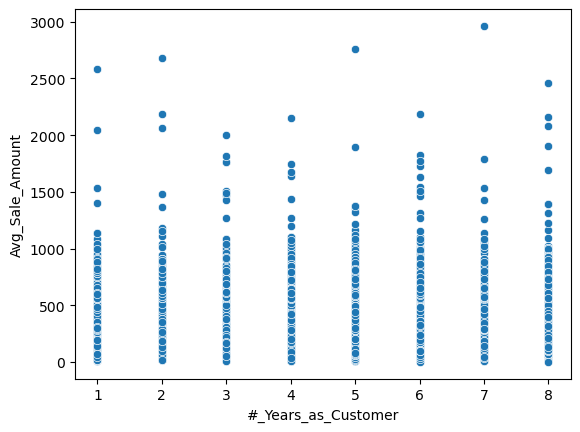

In [76]:
sns.scatterplot(y = p1_Customers2['Avg_Sale_Amount'], x =p1_Customers2 ['#_Years_as_Customer'])

<AxesSubplot:xlabel='Customer_Segment', ylabel='Avg_Sale_Amount'>

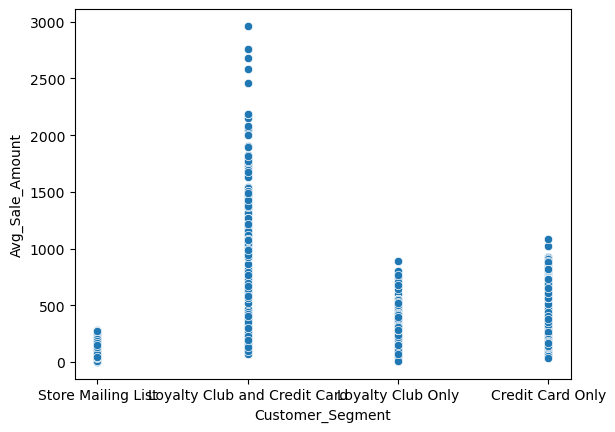

In [75]:
sns.scatterplot(y = p1_Customers2['Avg_Sale_Amount'], x =p1_Customers2 ['Customer_Segment'])

<AxesSubplot:xlabel='Avg_Num_Products_Purchased', ylabel='Avg_Sale_Amount'>

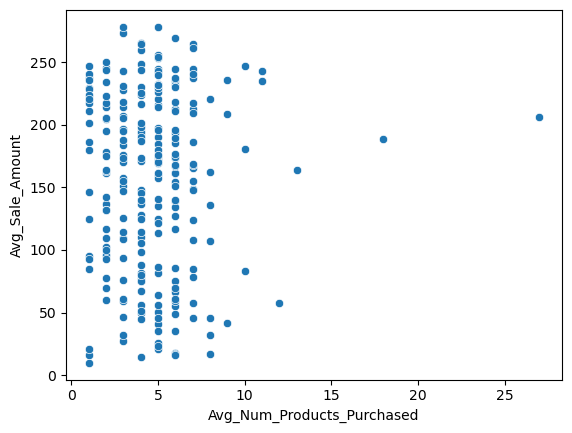

In [80]:
sns.scatterplot(y = p1_Customers2['Avg_Sale_Amount'], x =p1_mailinglist1 ['Avg_Num_Products_Purchased'])

<AxesSubplot:>

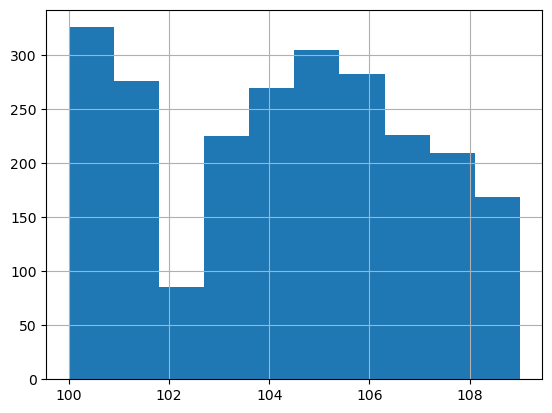

In [81]:
p1_Customers2.Store_Number.hist()

<AxesSubplot:>

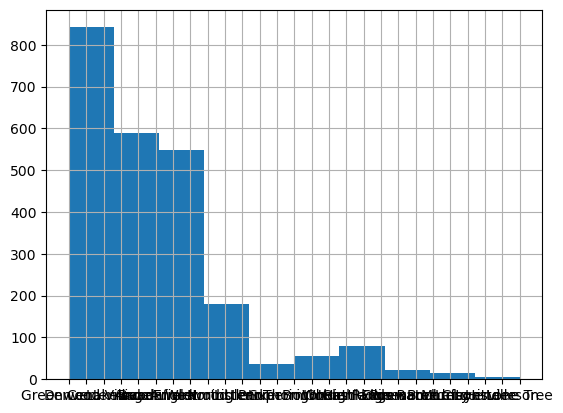

In [82]:
p1_Customers2.City.hist()

In [ ]:
Subject: Decision Recommendation Report - Catalog Mailing Campaign
Dear Management,

I am writing this report to provide you with detailed insights and recommendations regarding the upcoming catalog mailing campaign. Based on the analysis conducted, I will address the following key points:
Decision Needed:
The decision that needs to be made is whether to send the catalog to the 250 customers identified in the "p1-mailinglist1.xlsx" dataset.
Data Required:
To inform the decision, the following data was used:
"p1_Customers2.xlsx" dataset: This dataset provided information on approximately 2,300 customers and was used to train the predictive model.
"p1-mailinglist1.xlsx" dataset: This dataset consists of the 250 customers who would be potential recipients of the catalog. It was used to estimate the expected revenue and profit from sending the catalog.
Recommendation:
Based on the analysis, I recommend sending the catalog to the selected 250 customers.

Justification of Recommendation:
To arrive at this recommendation, the following steps were undertaken:

a. Model Training:
A linear regression model was trained using the "p1_Customers2.xlsx" dataset. The model was trained to predict the average sale amount based on customer features such as Customer ID, Average Number of Products Purchased, and Number of Years as a Customer.

b. Predicting Sales for Mailing List Customers:
The trained model was then applied to the "p1-mailinglist1.xlsx" dataset to predict sales for the 250 customers. This prediction was done by utilizing the customer features in the mailing list dataset.

c. Calculation of Expected Revenue and Profit:
The expected revenue for each customer was calculated by multiplying the predicted sales amount with the corresponding probability of purchase. This probability of purchase was given in the "Score_Yes" column of the mailing list dataset. The expected revenue for all customers in the mailing list was summed to obtain the total expected profit.

d. Comparison with Catalog Cost:
The calculated expected profit was then compared with the cost of sending the catalog. If the expected profit exceeded the cost, it was deemed financially viable to send the catalog.

Expected Profit:
The expected profit from sending the catalog to the 250 customers is  $45867.51.This profit considers the predicted sales amount for each customer multiplied by the corresponding probability of purchase.

Technical Report:
To ensure the reliability of the model and justify the recommendation, the following analyses were conducted:

a. Linear Relationship:
Scatterplots were created to assess the linear relationship between each numerical predictor variable and the target variable (average sale amount). These scatterplots revealed a positive correlation, indicating a potential influence of the predictors on the target.

b. Statistical Significance:
The significance of each predictor variable was evaluated using p-values. A p-value threshold of 0.05 was set, and predictor variables were considered significant if their p-values were less than or equal to 0.05. This analysis indicated that all predictor variables were statistically significant.

c. Model Performance:
The model's performance was assessed using the R-squared value, which measures the proportion of the target variable's variance explained by the predictors. A higher R-squared value indicates a better fit of the model. The obtained R-squared value (insert the actual R-squared value here) demonstrated that the model explains a substantial portion of the variance in the target variable.

In conclusion, based on the statistical significance of predictor variables, the linear relationship between predictors and the target, and the calculated expected profit, it is recommended to send the catalog to the 250 customers. This decision is projected to yield an expected profit of $45867.51.

